<a href="https://colab.research.google.com/github/Saurabh1Barasiya/tensorflow/blob/master/Deep_lr_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.1


# Loaad the data

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [10]:
print("Tranning dataset is - ")
X_train.shape,y_train.shape

Tranning dataset is - 


((60000, 28, 28), (60000,))

In [11]:
print("Testing dataset is - ")
X_test.shape,y_test.shape

Testing dataset is - 


((10000, 28, 28), (10000,))

In [12]:
X_train.ndim

3

In [13]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

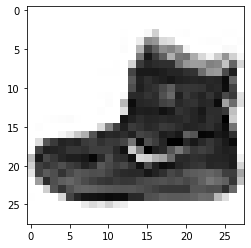

In [14]:
plt.imshow(X_train[0], cmap='Greys')

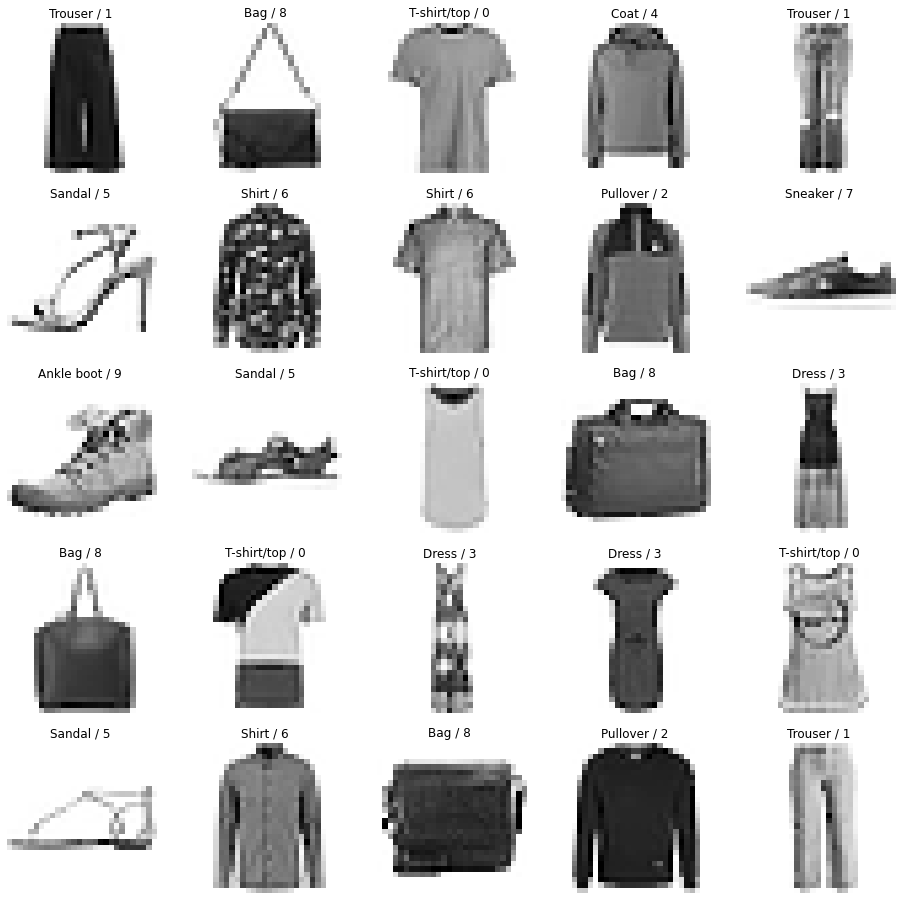

In [17]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0, 1000, 25):
   plt.subplot(5,5,j); j+=1
   plt.imshow(X_train[i], cmap="Greys")
   plt.axis('off') # off the axis
   plt.title(f"{class_labels[y_train[i]]} / {y_train[i]} ")  

In [18]:
# expected conv2d_input to have 4 dimensions, but got array with shape (28, 28, 1)
# so we have increase the dimention 3 to 4
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [19]:
X_train.shape 

(60000, 28, 28, 1)

In [20]:
X_train.ndim

4

# Feature Scaling

In [21]:
X_train = X_train/255
X_test = X_test/255

In [22]:
from sklearn.model_selection import train_test_split 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [23]:
X_train.shape,  y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

## Convolutional Neural Network - Model Building

In [24]:
#Building CNN model
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128, activation='relu'),
                         keras.layers.Dense(units=10, activation='softmax')
])

In [25]:
cnn_model.summary() # get the summary of model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [26]:
# complie the model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# train cnn model
cnn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_data=(X_validation, y_validation))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 20s 416us/step - loss: 0.6277 - accuracy: 0.7886 - val_loss: 0.4455 - val_accuracy: 0.8396
Epoch 2/10
48000/48000 [==============================] - 19s 404us/step - loss: 0.3755 - accuracy: 0.8696 - val_loss: 0.3564 - val_accuracy: 0.8784
Epoch 3/10
48000/48000 [==============================] - 20s 410us/step - loss: 0.3286 - accuracy: 0.8850 - val_loss: 0.3278 - val_accuracy: 0.8855
Epoch 4/10
48000/48000 [==============================] - 20s 408us/step - loss: 0.2988 - accuracy: 0.8952 - val_loss: 0.3234 - val_accuracy: 0.8861
Epoch 5/10
48000/48000 [==============================] - 19s 402us/step - loss: 0.2765 - accuracy: 0.9016 - val_loss: 0.3063 - val_accuracy: 0.8911
Epoch 6/10
48000/48000 [==============================] - 20s 407us/step - loss: 0.2586 - accuracy: 0.9087 - val_loss: 0.3003 - val_accuracy: 0.8945
Epoch 7/10
48000/48000 [==============================] 